In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import prince

from sklearn.decomposition import PCA

In [2]:
HOUSE_TASKS_CSV = '../data/housetasks.csv'

In [3]:
housetasks = pd.read_csv(HOUSE_TASKS_CSV)
housetasks.head()

,Task,Wife,Alternating,Husband,Jointly
0,Laundry,156,14,2,4
1,Main_meal,124,20,5,4
2,Dinner,77,11,7,13
3,Breakfast,82,36,15,7
4,Tidying,53,11,1,57


In [4]:
housetasks = pd.read_csv(HOUSE_TASKS_CSV, index_col=0)
housetasks.head()

,Wife,Alternating,Husband,Jointly
Task,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57


In [5]:
pca_ret = PCA(n_components=2)
pca_ret.fit(housetasks)

PCA(n_components=2)

In [6]:
loadings = pd.DataFrame(pca_ret.components_, columns=housetasks.columns)
print(loadings)

       Wife  Alternating   Husband   Jointly
0  0.814998     0.052404 -0.419152 -0.396666
1  0.010669     0.093200  0.701224 -0.706742


In [7]:
var_ratio = pca_ret.explained_variance_ratio_
print(f"PC 1       : {var_ratio[0] * 100:.2f}")
print(f"PC 2       : {var_ratio[1] * 100:.2f}")
print(f"PC SUM     : {sum(var_ratio) * 100:.2f}")

PC 1       : 52.84
PC 2       : 37.97
PC SUM     : 90.80


In [8]:
loadings = pca_ret.components_.T * np.sqrt(pca_ret.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=housetasks.columns)

print("loading matrix")
print(loading_matrix)

loading matrix
                   PC1        PC2
Wife         48.629430   0.539612
Alternating   3.126865   4.713844
Husband     -25.010040  35.466198
Jointly     -23.668308 -35.745285


In [11]:
pca = prince.PCA(n_components=2)
pca = pca.fit(housetasks)

In [12]:
pca.explained_inertia_

array([0.42678638, 0.34759897])

In [14]:
pca.column_correlations(housetasks)

,0,1
Alternating,-0.638570,0.351049
Husband,0.213738,0.888853
Jointly,0.854251,-0.422801
Wife,-0.723840,-0.546206


In [9]:
ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

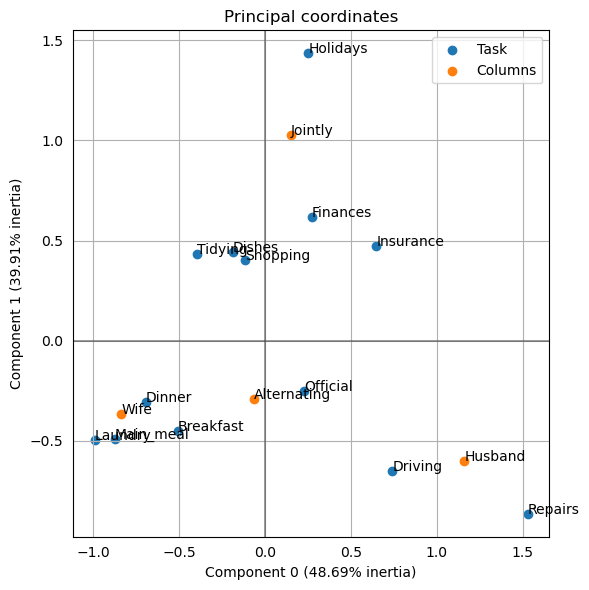

In [10]:
ca.plot_coordinates(housetasks, figsize=(6, 6))
plt.tight_layout()
plt.show()